<a href="https://colab.research.google.com/github/gagarcia/COVID-19/blob/master/death_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [0]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [0]:
deaths.set_index('Country/Region',inplace = True)

In [0]:
confirmed.set_index('Country/Region',inplace = True)

In [0]:
deaths_clean = deaths.drop(['Province/State','Lat','Long'],axis=1)
confirmed_clean = confirmed.drop(['Province/State','Lat','Long'],axis=1)

In [0]:
deaths_clean.index.name = None
confirmed_clean.index.name = None

In [0]:
deaths_clean = deaths_clean.transpose()
confirmed_clean = confirmed_clean.transpose()

In [0]:
deaths_clean.index = pd.to_datetime(deaths_clean.index, format='%m/%d/%y')
confirmed_clean.index = pd.to_datetime(confirmed_clean.index, format='%m/%d/%y')

In [54]:
confirmed_clean['Brazil']

2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2020-04-18    36658
2020-04-19    38654
2020-04-20    40743
2020-04-21    43079
2020-04-22    45757
Name: Brazil, Length: 92, dtype: int64

In [0]:
Brazil = pd.concat([confirmed_clean['Brazil'],deaths_clean['Brazil']],axis=1)
Brazil.columns = ['Brazil Confirmed', 'Brazil Deaths']

Evolução da dença em escala linear, abaixo vou plotar em escala log pra vermos se a evolução ja saiu de uma exponencial

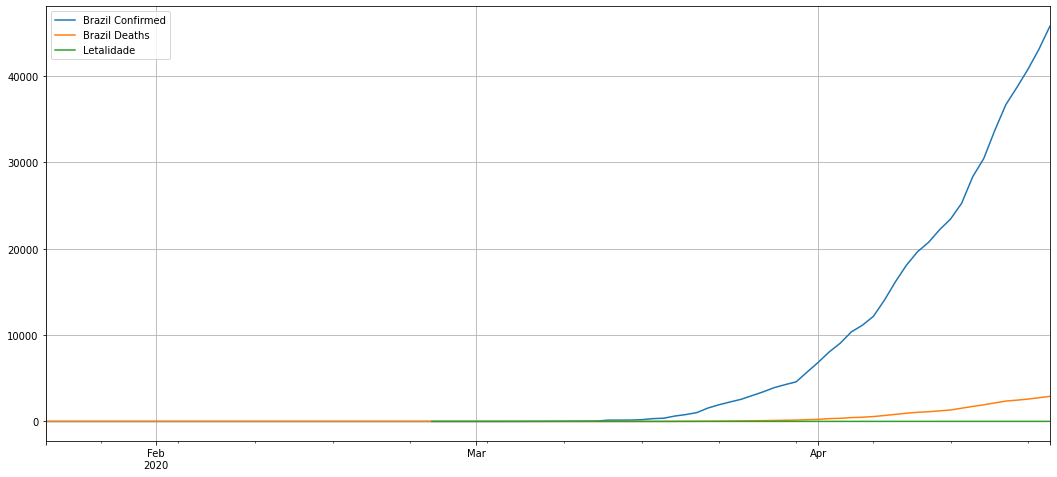

In [66]:
Brazil.plot(figsize=(18,8), grid=True)

Na escala LOG abaixo da pra observar que a inclinação das retas estão tendendo a 0 indicando que estamos saindo de uma evolução exponencial para uma evolução linear, mas ainda exponencial.

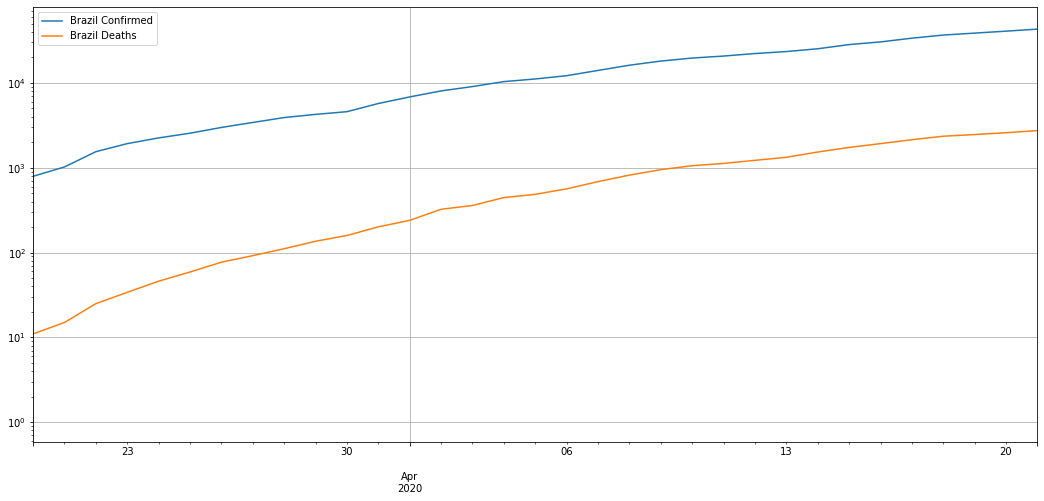

In [57]:
Brazil.plot(figsize=(18,8), grid=True,logy=True,xlim=['2020-03-20','2020-04-21'])

Variação % diaria, que parece estar se estabilizando e não crescendo, confirmando a conclusão do plot acima.

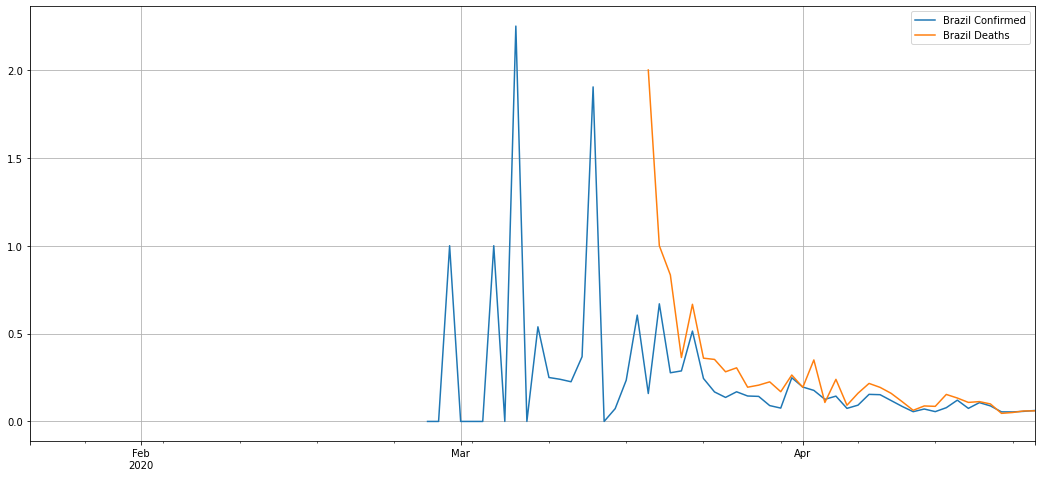

In [58]:
Brazil.pct_change().plot(figsize=(18,8),grid=True)

In [0]:
from pandas.plotting import scatter_matrix

Nos gráficos de mortes por casos confirmados existe uma linearidade, sendo que podemos calcular letalidade conforme abaixo

In [0]:
Brazil['Letalidade'] = Brazil['Brazil Deaths']*100/Brazil['Brazil Confirmed']

Nos graficos de Deaths vs Confirmed parace existir uma linearidade, indicando que os sistemas de saude ainda não estão sobrecarregados.

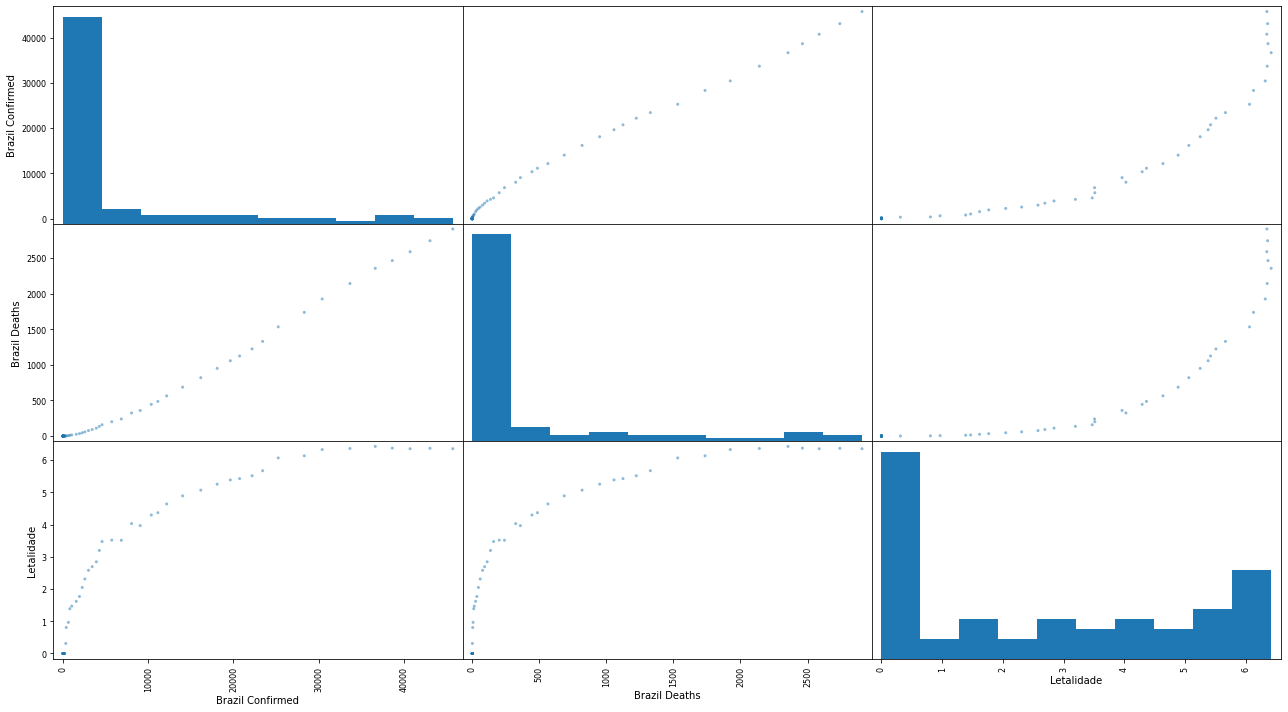

In [61]:
scatter_matrix(Brazil,figsize=(22,12));

Evolução da letalidade da doença, se estabilizando em 6% de todos que são diagnosticados positivos

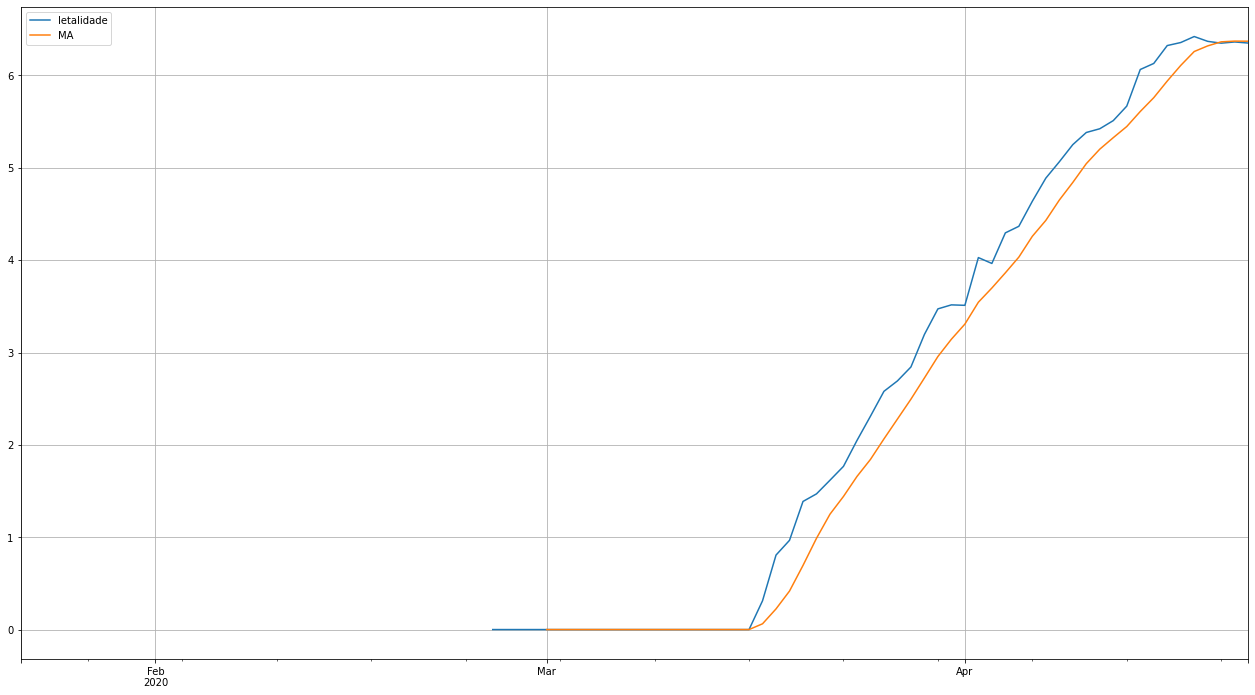

In [62]:
Brazil['Letalidade'].plot(figsize=(22,12), label = 'letalidade')
Brazil.rolling(window=5).mean()['Letalidade'].plot(label = 'MA',grid=True)
plt.legend()

In [63]:
Brazil.tail()

,Brazil Confirmed,Brazil Deaths,Letalidade
2020-04-18,36658,2354,6.421518
2020-04-19,38654,2462,6.369328
2020-04-20,40743,2587,6.349557
2020-04-21,43079,2741,6.362729
2020-04-22,45757,2906,6.350941


Letalidade média de 5.44% nos ultimos 20 dias.

In [64]:
Brazil['Letalidade'][-5:].mean()

6.370814491038809